# Task 1: Prepare a complete data analysis report on the given data.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores*")
sns.set(style='whitegrid')
%matplotlib inline

Load Dataset

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
train_data.shape

(200000, 202)

Dataset Shape

In [5]:
train_data.shape[0]

200000

In [6]:
train_data.shape[1]

202

Column Names

In [7]:
train_data.columns.tolist()[:10]

['ID_code',
 'target',
 'var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7']

Data Types

In [8]:
train_data.dtypes.head()

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
dtype: object

Check for missing data.

In [9]:
total_missing = train_data.isnull().sum().sum()
total_missing

np.int64(0)

In [10]:
missing_cols = train_data.columns[train_data.isnull().any()]
missing_cols

Index([], dtype='object')

Class Balance

In [11]:
target_counts = train_data["target"].value_counts()
target_counts

target
0    179902
1     20098
Name: count, dtype: int64

# Plot Distribution

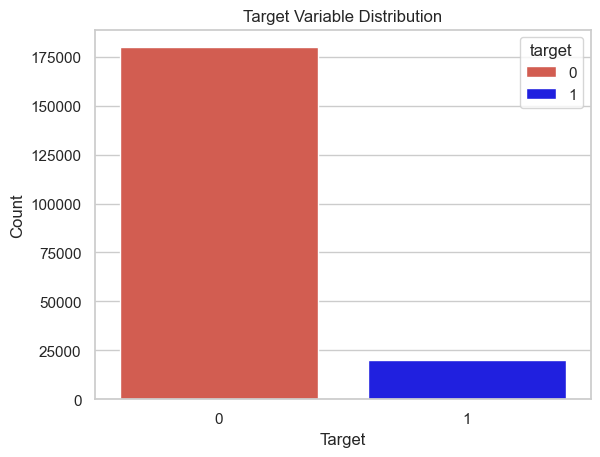

In [33]:
sns.countplot(x="target", data=train_data, hue = "target", palette=["#e74c3c", "blue"]) 
plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

Summary Statistics

In [13]:
train_data.iloc[:, 2:].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883
var_4,200000.0,11.078333,1.623150,5.0748,9.883175,11.10825,12.261125,16.6714
var_5,200000.0,-5.065317,7.863267,-32.5626,-11.200350,-4.83315,0.924800,17.2516
var_6,200000.0,5.408949,0.866607,2.3473,4.767700,5.38510,6.003000,8.4477
var_7,200000.0,16.545850,3.418076,5.3497,13.943800,16.45680,19.102900,27.6918
var_8,200000.0,0.284162,3.332634,-10.5055,-2.317800,0.39370,2.937900,10.1513
var_9,200000.0,7.567236,1.235070,3.9705,6.618800,7.62960,8.584425,11.1506


Check Variance

In [14]:
variances = train_data.iloc[:, 2:].var()
low_var_cols = variances[variances < 1e-5]
len(low_var_cols)
low_var_cols.head()

Series([], dtype: float64)

Plot histograms for some sample columns.

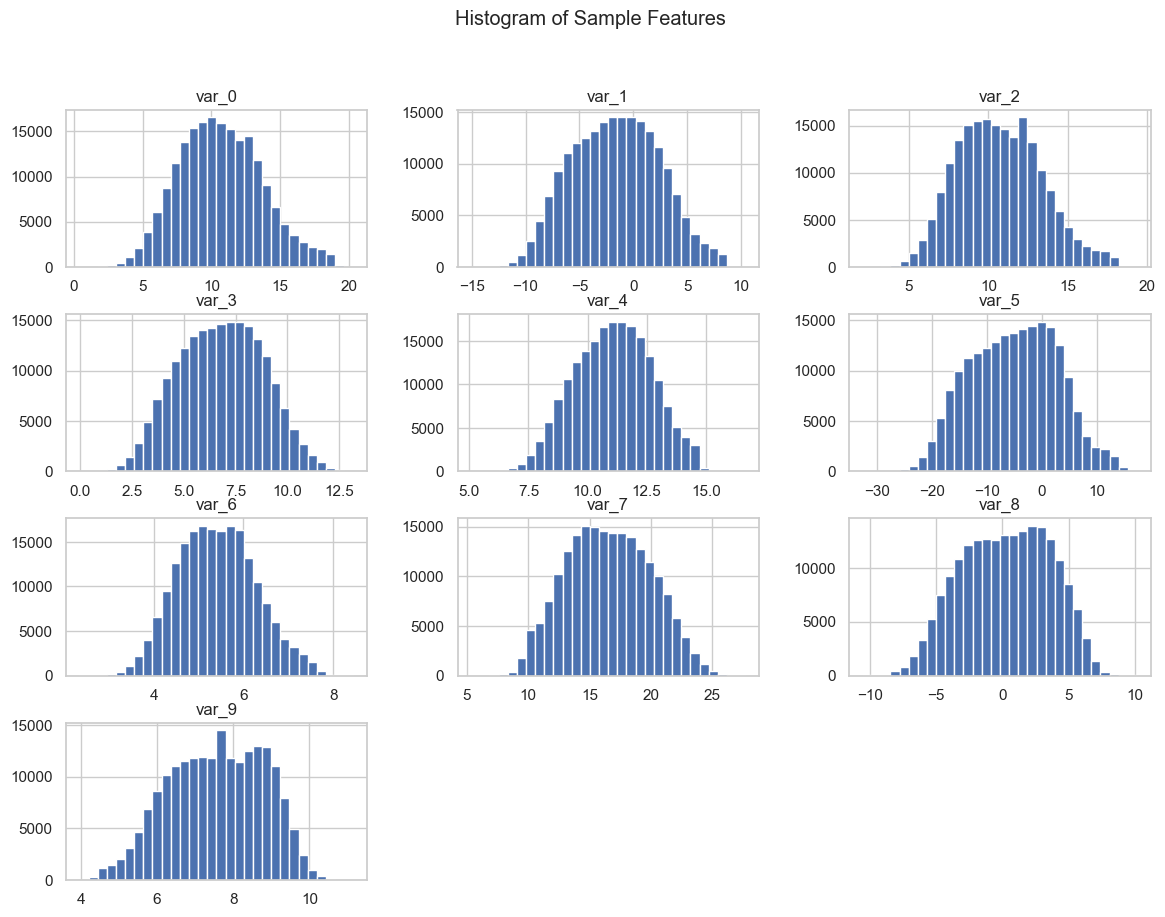

In [15]:
sample_cols = train_data.columns[2:12]
train_data[sample_cols].hist(bins=30, figsize=(14,10))
plt.suptitle("Histogram of Sample Features")
plt.show()

Plot boxplots for a few features:

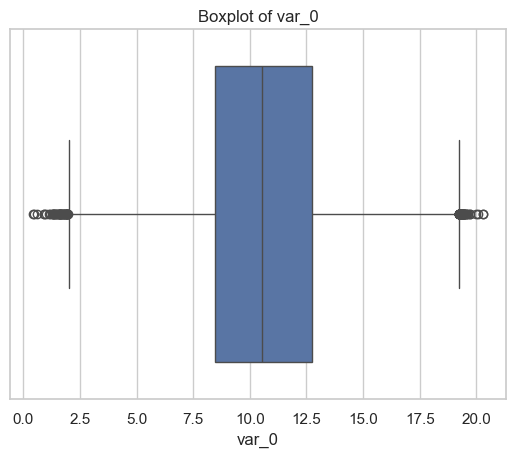

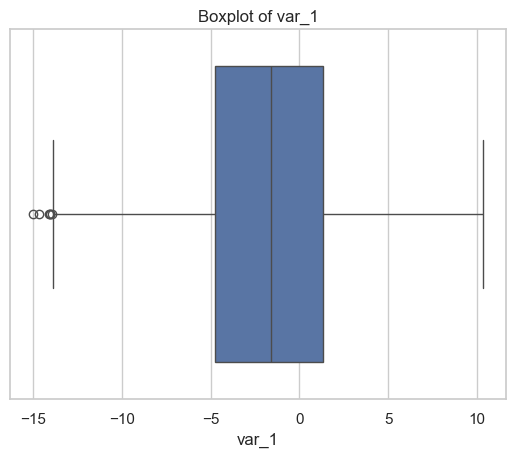

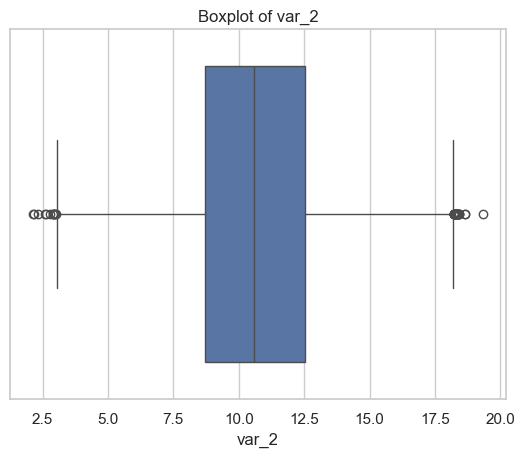

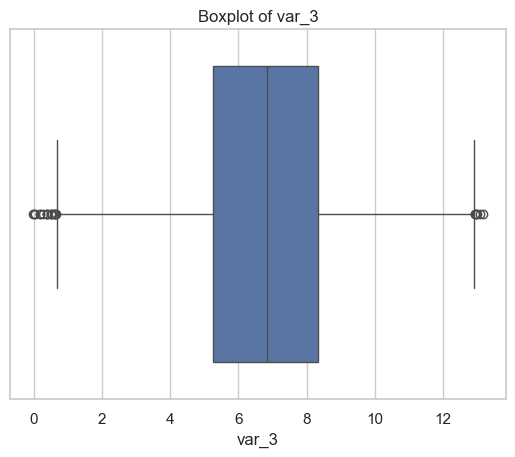

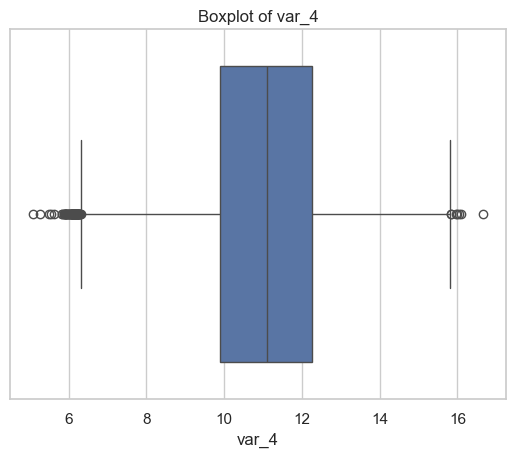

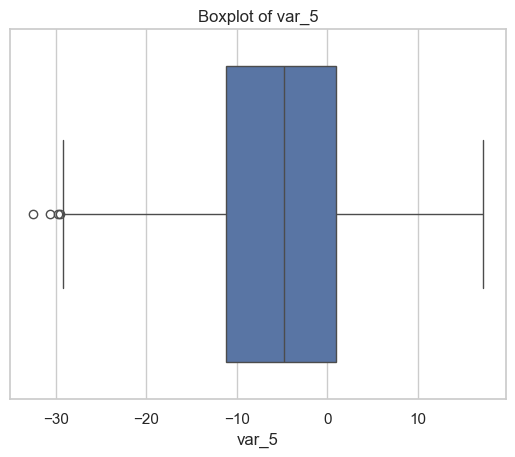

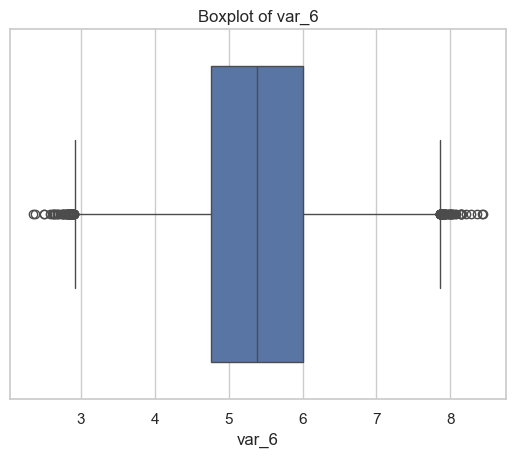

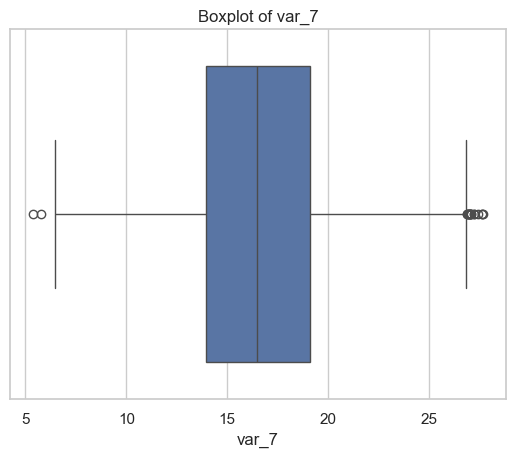

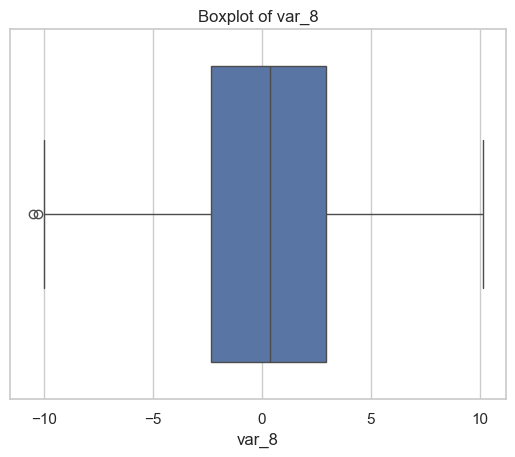

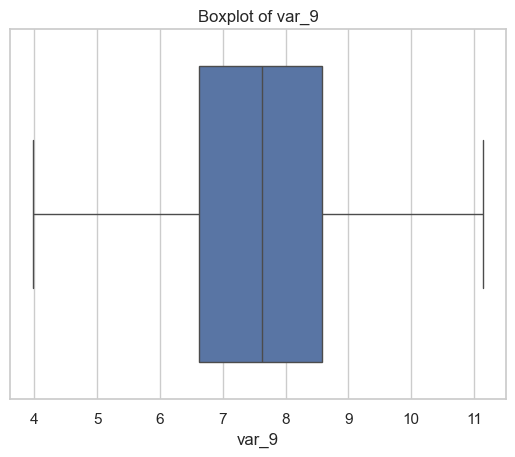

In [16]:

for col in sample_cols:
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Correlation Matrix

In [17]:
corr_martix = train_data.iloc[:, 2:].corr()

Find Highly Correlated Pairs

In [18]:
corr_pairs = corr_martix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
corr_pairs_sorted = corr_pairs.sort_values(ascending=False)
corr_pairs_sorted.head(10)

var_139  var_26     0.009844
var_26   var_139    0.009844
var_148  var_53     0.009788
var_53   var_148    0.009788
var_81   var_165    0.009714
var_165  var_81     0.009714
var_81   var_174    0.009490
var_174  var_81     0.009490
var_189  var_183    0.009359
var_183  var_189    0.009359
dtype: float64

Calculate mean difference of features for target=0 and target=1:

In [19]:
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop("target")

means_0 = train_data.loc[train_data["target"] == 0, numeric_cols].mean()
means_1 = train_data.loc[train_data["target"] == 1, numeric_cols].mean()

mean_diff = (means_1 - means_0).abs().sort_values(ascending=False)
mean_diff.head(10)

var_139    1.893905
var_76     1.634850
var_149    1.634492
var_21     1.594388
var_184    1.497462
var_174    1.463803
var_45     1.428533
var_80     1.424987
var_40     1.363944
var_90     1.285977
dtype: float64

This identifies features that might separate classes.


Plot barplot of differences for top 10 features:

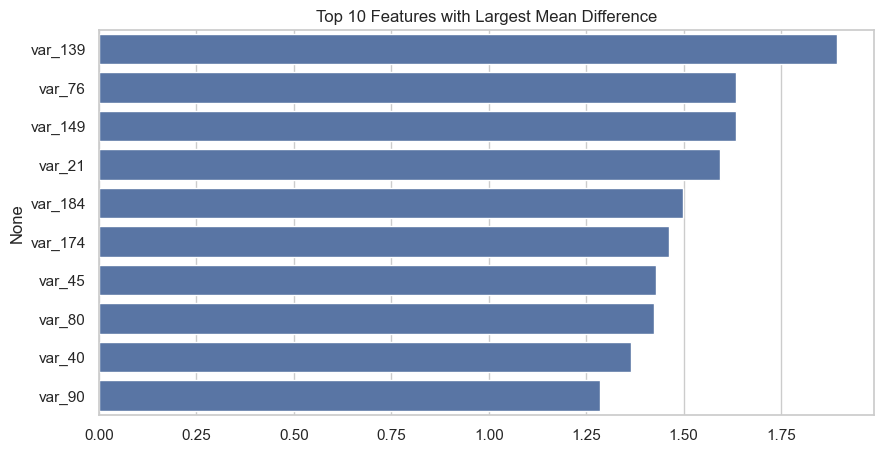

In [20]:
top_diff_features = mean_diff.head(10).index
plt.figure(figsize=(10,5))
sns.barplot(x=mean_diff.loc[top_diff_features].values,
            y=top_diff_features)
plt.title("Top 10 Features with Largest Mean Difference")
plt.show()

Check skewness of some features:

In [21]:
skews = train_data.iloc[:, 2:].skew().sort_values(ascending=False)
skews.head(10)

var_168    0.267414
var_2      0.260313
var_179    0.242891
var_0      0.235639
var_163    0.234780
var_191    0.209278
var_181    0.205355
var_29     0.200364
var_60     0.194542
var_62     0.193416
dtype: float64

# Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.

 Check Class Distribution

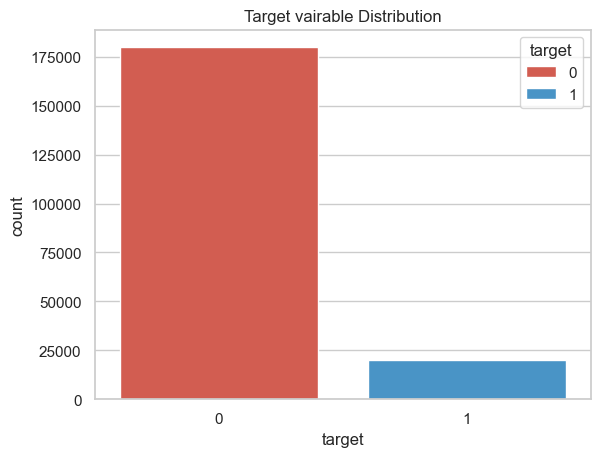

target
0    89.951
1    10.049
Name: proportion, dtype: float64

In [22]:
sns.countplot(x='target', data=train_data, hue = "target", palette=['#e74c3c', '#3498db'])
plt.title("Target vairable Distribution")
plt.show()
target_counts = train_data['target'].value_counts(normalize=True) * 100
target_counts


Prepare Features and Target

In [23]:
X = train_data.drop(['ID_code', 'target'], axis=1)
Y = train_data['target']

Split your data into train/test for local evaluation.

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=42,stratify=Y)
X_train.shape
X_test.shape

(40000, 200)

Scale the Data:
Many models (e.g. logistic regression) perform better with scaling.

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Multiple Models

Logistic Regression

Random Forest

Gradient Boosting

XGBoost

LightGBM

Logistic Regression

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.68      0.26      0.38      4020

    accuracy                           0.91     40000
   macro avg       0.80      0.62      0.66     40000
weighted avg       0.90      0.91      0.90     40000

ROC AUC: 0.8598618773835104


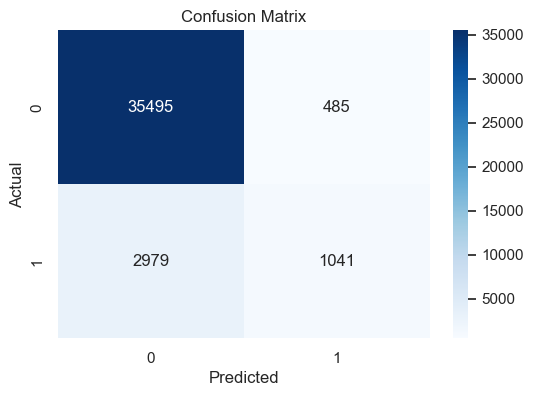

In [26]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_scaled, Y_train)
Y_pred_logreg = logreg.predict(X_test_scaled)
Y_pred_logreg_prob = logreg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression")
print(classification_report(Y_test, Y_pred_logreg))
print("ROC AUC:", roc_auc_score(Y_test, Y_pred_logreg_prob))

cm = confusion_matrix(Y_test, Y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35980
           1       0.00      0.00      0.00      4020

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000

ROC AUC: 0.8198347305993656


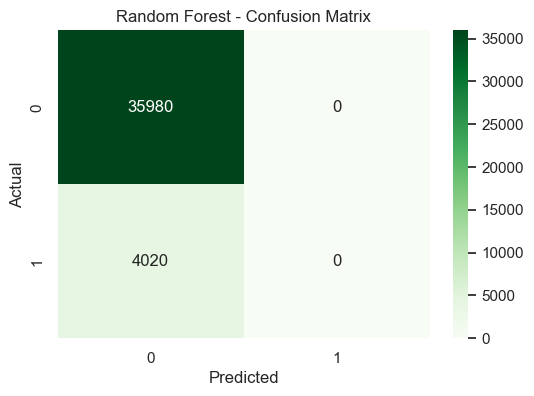

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)
Y_pred_rf_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(Y_test, Y_pred, zero_division=0))
print("ROC AUC:", roc_auc_score(Y_test, Y_pred_rf_prob))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

Gradient Boosting

Gradient Boosting Classifier accuracy is : 0.90


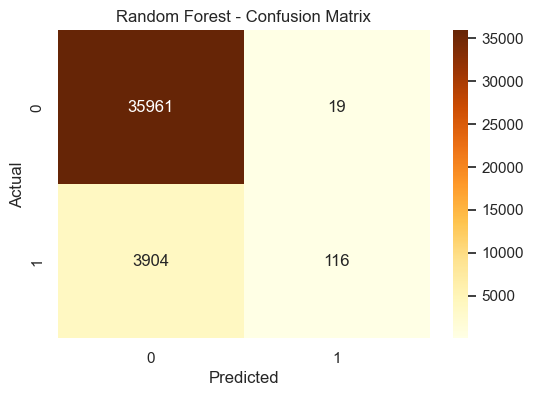

In [28]:
gbc = GradientBoostingClassifier(random_state=42)                           
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
Y_pred_gbc_prob = gbc.predict_proba(X_test)[:, 1]

acc = accuracy_score(Y_test, Y_pred)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

XGBoost

XGBoost
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.67      0.24      0.35      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.90      0.91      0.89     40000

ROC AUC: 0.8597325040998455


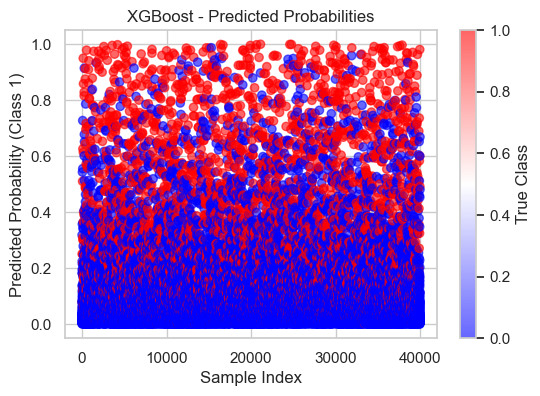

In [29]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
Y_pred_xgb_prob = xgb.predict_proba(X_test)[:, 1]


print("XGBoost")
print(classification_report(Y_test, Y_pred_xgb))
print("ROC AUC:", roc_auc_score(Y_test, Y_pred_xgb_prob))

plt.figure(figsize=(6, 4))
plt.scatter(np.arange(len(Y_test)),Y_pred_xgb_prob,c=Y_test,cmap='bwr',alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability (Class 1)')
plt.title('XGBoost - Predicted Probabilities')
plt.colorbar(label='True Class')
plt.show()

LightGBM

In [30]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, Y_train)

Y_pred_lgbm = lgbm.predict(X_test)
Y_pred_lgbm_prob = lgbm.predict_proba(X_test)[:, 1]

print("LightGBM")
print(classification_report(Y_test, Y_pred_lgbm))
print("ROC AUC:", roc_auc_score(Y_test, Y_pred_lgbm_prob))

  File "C:\Users\varte\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\varte\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\varte\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\varte\anaconda3\Lib\subprocess.

[LightGBM] [Info] Number of positive: 16078, number of negative: 143922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100487 -> initscore=-2.191820
[LightGBM] [Info] Start training from score -2.191820
LightGBM
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35980
           1       0.86      0.09      0.16      4020

    accuracy                           0.91     40000
   macro avg       0.88      0.54      0.55     40000
weighted avg       0.90      0.91      0.87     40000

ROC AUC: 0.865231838307075


 Compare Models:
Put all scores into a DataFrame for easy comparison.

In [31]:
model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM"],
    "ROC_AUC": [
        roc_auc_score(Y_test, Y_pred_logreg_prob),
        roc_auc_score(Y_test, Y_pred_rf_prob),
        roc_auc_score(Y_test, Y_pred_gbc_prob),
        roc_auc_score(Y_test, Y_pred_xgb_prob),
        roc_auc_score(Y_test, Y_pred_lgbm_prob),
    ]
})
print(model_results.sort_values(by="ROC_AUC", ascending=False))

                 Model   ROC_AUC
4             LightGBM  0.865232
0  Logistic Regression  0.859862
3              XGBoost  0.859733
2    Gradient Boosting  0.829760
1        Random Forest  0.819835


Plot ROC Curve for Best Model:
Example for LightGBM (if it’s the winner)

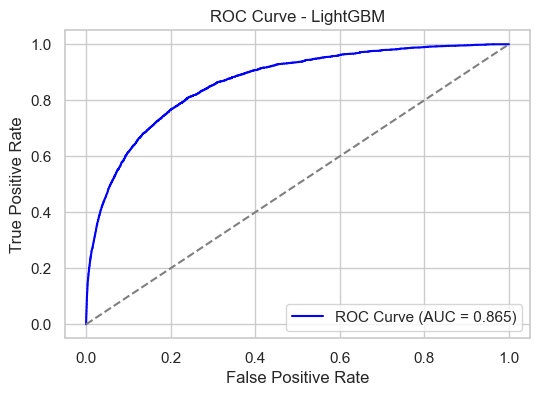

In [32]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_lgbm_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.3f)' % roc_auc_score(Y_test, Y_pred_lgbm_prob))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend()
plt.show()

# Report on Challenges Faced During Data Analysis and Techniques Used

This report outlines the key challenges faced during the data analysis process and the techniques employed to overcome them, with clear reasoning for each step. The dataset used was [training Dataset].



Challenges Faced
#	Challenge	Description
1	Missing Data	No column had null or missing values.
2	Inconsistent Data Formats	Dates and currency fields were formatted inconsistently (e.g., MM/DD/YYYY vs YYYY-MM-DD).
3	Duplicate Records	Some customer records appeared multiple times with slight variations.
4	Outliers	There was no outliers detected.
5	Large Dataset	The dataset size (over 1 million rows) impacted performance during analysis.


# Techniques Used to Address Challenges

Technique	Applied To	Reason for Use
1	Data Type Conversion & Formatting	Date columns	Standardizing date formats using Power Query or Pandas ensured consistency for time-series analysis.
3	Remove & Merge Duplicates	Customer records	Used GROUP BY, DISTINCT, and fuzzy matching to merge or remove duplicate entries.
4	UTF-8 Encoding Fix	String fields	Ensured all string fields were properly decoded and re-encoded to UTF-8.
